In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from pathlib import Path

from sklearn.metrics import r2_score
import matplotlib.ticker as mticker
from lmfit.models import PowerLawModel

# Global plot parameters
plt.rcParams.update({'font.size':20, 'lines.markersize':9})
plt.rcParams.update({'mathtext.fontset':'cm'})
plt.rcParams.update({'font.family':'Times New Roman'})

In [2]:
def power_fit_lmfit(params, x, y):
        a = params['a']
        b = params['b']
        y_fit = a*x**b
        
        return y_fit-y

def func_powerlaw(x, a, b):
        return a*x**b

def calc_rsquared(x, y, amplitude, exponent):
    yhat = func_powerlaw(x, amplitude, exponent)

    return r2_score(y, yhat)

In [3]:
dataBase_path = r'./'
dataBase_file = r'UUVPerformance.xlsx'

In [4]:
data_path = Path(dataBase_path, dataBase_file)
bcfDF = pd.read_excel(data_path, sheet_name = 'BCF')
mpfDF = pd.read_excel(data_path, sheet_name='MPF')
convDF = pd.read_excel(data_path, sheet_name = 'Propeller')
liftDF = pd.read_excel(data_path, sheet_name="LiftBased")

In [5]:
conv_cot = convDF[convDF['COTopt [J/m]'].notnull()]
bcf_cot = bcfDF[bcfDF['COTopt [J/m]'].notnull()]
mpf_cot = mpfDF[mpfDF['COTopt [J/m]'].notnull()]
lift_cot = liftDF[liftDF['COTopt [J/m]'].notnull()]

# sort the column values in ascending order
conv_cot = conv_cot.sort_values('Locomotion')
bcf_cot = bcf_cot.sort_values('Locomotion')
mpf_cot = mpf_cot.sort_values('Locomotion')
lift_cot = lift_cot.sort_values('Locomotion')

In [6]:
conv_names = conv_cot['Name'].unique()
bcf_names = bcf_cot['Name'].unique()
mpf_names = mpf_cot['Name'].unique()
lift_names = lift_cot['Name'].unique()

conv_dfs = [conv_cot[conv_cot['Name']==name] for name in conv_names]
bcf_dfs = [bcf_cot[bcf_cot['Name']==name] for name in bcf_names]
mpf_dfs = [mpf_cot[mpf_cot['Name']==name] for name in mpf_names]
lift_dfs = [lift_cot[lift_cot['Name']==name] for name in lift_names]

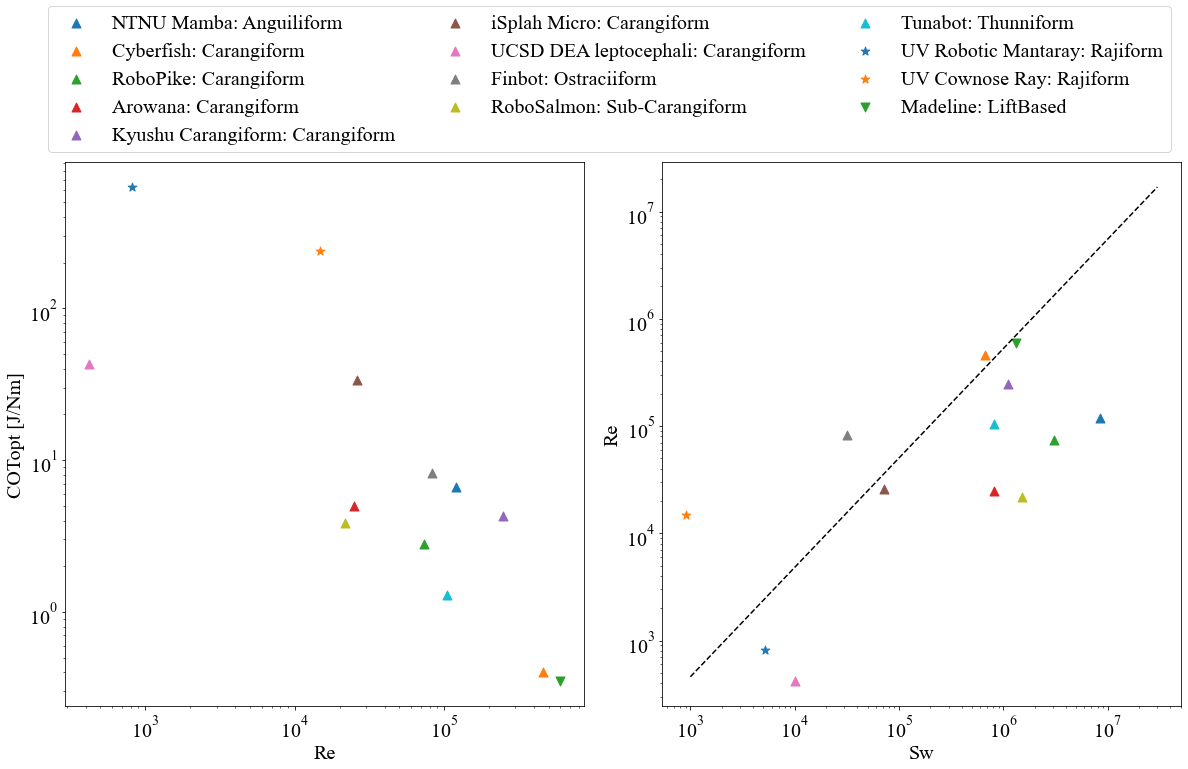

In [7]:
fig1, axs = plt.subplots(1, 2, figsize=(20,10), facecolor='w')
axs.flatten()

fig1.subplots_adjust(wspace=0.15)

# for auv in conv_dfs:
#     axs[0].scatter(auv['Re'].values, auv['COTopt [J/Nm]'].values, marker='o', label=auv['Name'].values[0] + ": " + auv['Locomotion'].values[0])
#     axs[1].scatter(auv['Jw'].values, auv['Re'].values, marker='o', label=auv['Name'].values[0] + ": " + auv['Locomotion'].values[0])

for auv in bcf_dfs:
    axs[0].scatter(auv['Re'].values[0], auv['COTopt [J/Nm]'].values[0], marker='^', label=auv['Name'].values[0] + ": " + auv['Locomotion'].values[0])
    axs[1].scatter(auv['Sw'].values[0], auv['Re'].values[0], marker='^', label=auv['Name'].values[0] + ": " + auv['Locomotion'].values[0])

for auv in mpf_dfs:
    axs[0].scatter(auv['Re'].values[0], auv['COTopt [J/Nm]'].values[0], marker='*', label=auv['Name'].values[0] + ": " + auv['Locomotion'].values[0])
    axs[1].scatter(auv['Sw'].values[0], auv['Re'].values[0], marker='*', label=auv['Name'].values[0] + ": " + auv['Locomotion'].values[0])

for auv in lift_dfs:
    axs[0].scatter(auv['Re'].values[0], auv['COTopt [J/Nm]'].values[0], marker='v', label=auv['Name'].values[0] + ": " + auv['Locomotion'].values[0])
    axs[1].scatter(auv['Sw'].values[0], auv['Re'].values[0], marker='v', label=auv['Name'].values[0] + ": " + auv['Locomotion'].values[0])

dx = np.linspace(1e3, 3e7, 100)
Re_low = 0.03*dx**1.31
Re_high = 0.4*dx**1.02

#axs[1].plot(dx, 0.03*dx**1.31, 'k-')
axs[1].plot(dx, 0.4*dx**1.02, 'k--')
# axs[1].plot(dx, 1.4*dx**0.96, 'r--')

axs[0].set_xlabel('Re')
axs[0].set_ylabel('COTopt [J/Nm]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].legend(ncol=3, loc=4, bbox_to_anchor=(2.15, 1.00))

axs[1].set_xlabel('Sw')
axs[1].set_ylabel('Re')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
# axs[1].set_xlim([3e3, 3e7])
# axs[1].set_ylim([5e2, 2e7])

fig1.savefig('COT_SW.pdf', facecolor='w', dpi=300, bbox_inches='tight')

In [8]:
dataBase_path = r'./'
dataBase_file = r'UUVDatabase.xlsx'

data_path = Path(dataBase_path, dataBase_file)
bcfDF = pd.read_excel(data_path, sheet_name = 'BCF')
mpfDF = pd.read_excel(data_path, sheet_name='MPF')
convDF = pd.read_excel(data_path, sheet_name = 'Propeller')
liftDF = pd.read_excel(data_path, sheet_name="LiftBased")

conv_depth = convDF[convDF['Max Depth [m]'].notnull()]
bcf_depth = bcfDF[bcfDF['Max Depth [m]'].notnull()]
mpf_depth = mpfDF[mpfDF['Max Depth [m]'].notnull()]
lift_depth = liftDF[liftDF['Max Depth [m]'].notnull()]

# sort the column values in ascending order
conv_depth = conv_depth.sort_values('Locomotion')
bcf_depth = bcf_depth.sort_values('Locomotion')
mpf_depth = mpf_depth.sort_values('Locomotion')
lift_depth = lift_depth.sort_values('Locomotion')

conv_names = conv_depth['Name'].unique()
bcf_names = bcf_depth['Name'].unique()
mpf_names = mpf_depth['Name'].unique()
lift_names = lift_depth['Name'].unique()

conv_dfs = [conv_depth[conv_depth['Name']==name] for name in conv_names]
bcf_dfs = [bcf_depth[bcf_depth['Name']==name] for name in bcf_names]
mpf_dfs = [mpf_depth[mpf_depth['Name']==name] for name in mpf_names]
lift_dfs = [lift_depth[lift_depth['Name']==name] for name in lift_names]

(-10.0, 125.0)

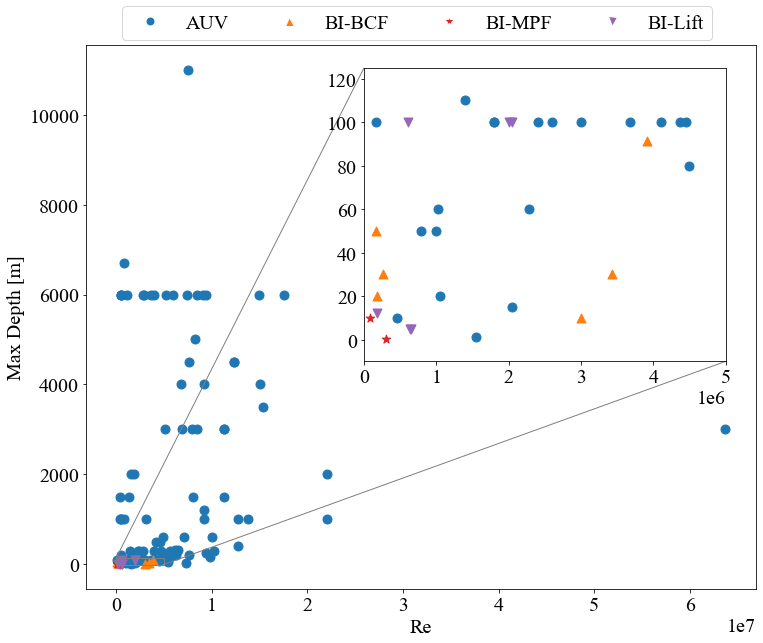

In [9]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes, mark_inset

legend_elements = [Line2D([0], [0], marker='o', color='w', label='AUV', 
                   markerfacecolor='tab:blue', markersize=9),
                   Line2D([0], [0], marker='^', color='w', label='BI-BCF', 
                   markerfacecolor='tab:orange', markersize=9),
                   Line2D([0], [0], marker='*', color='w', label='BI-MPF', 
                   markerfacecolor='tab:red', markersize=11),
                   Line2D([0], [0], marker='v', color='w', label='BI-Lift', 
                   markerfacecolor='tab:purple', markersize=9)]

fig2, ax2 = plt.subplots(figsize=(12,10), facecolor='w')

axins = inset_axes(ax2, width="60%", height="60%",
                   bbox_to_anchor=(.4, .4, .9, .9),
                   bbox_transform=ax2.transAxes, loc=3)

for auv in conv_dfs:
    ax2.scatter(auv['Re'].values, auv['Max Depth [m]'].values, marker='o', color='tab:blue', label='AUVs')
    axins.scatter(auv['Re'].values, auv['Max Depth [m]'].values, marker='o', color='tab:blue', label='AUVs')

for auv in bcf_dfs:
    ax2.scatter(auv['Re'].values, auv['Max Depth [m]'].values, marker='^', color='tab:orange', label='BI-BCF')
    axins.scatter(auv['Re'].values, auv['Max Depth [m]'].values, marker='^', color='tab:orange', label='BI-BCF')

for auv in mpf_dfs:
    ax2.scatter(auv['Re'].values, auv['Max Depth [m]'].values, marker='*', color='tab:red', label='BI-MPF')
    axins.scatter(auv['Re'].values, auv['Max Depth [m]'].values, marker='*', color='tab:red', label='BI-MPF')

for auv in lift_dfs:
    ax2.scatter(auv['Re'].values, auv['Max Depth [m]'].values, marker='v', color='tab:purple', label='BI-Lift')
    axins.scatter(auv['Re'].values, auv['Max Depth [m]'].values, marker='v', color='tab:purple', label='BI-Lift')

ax2.set_xlabel('Re')
ax2.set_ylabel('Max Depth [m]')
ax2.legend(handles=legend_elements, ncol=4, loc=1, bbox_to_anchor=(0.95, 1.09) )

mark_inset(ax2, axins, loc1=2, loc2=4, fc="none", ec="0.5")
axins.set_xlim([0, 0.5e7])
axins.set_ylim([-10, 125])

#fig2.savefig('Depth_Re.pdf', facecolor='w', dpi=300, bbox_inches='tight')

In [10]:
conv_mass = convDF[convDF['Weight [kg]'].notnull()]
bcf_mass = bcfDF[bcfDF['Weight [kg]'].notnull()]
mpf_mass = mpfDF[mpfDF['Weight [kg]'].notnull()]
lift_mass = liftDF[liftDF['Weight [kg]'].notnull()]

conv_mass = conv_mass[conv_mass['Re'].notnull()]
bcf_mass = bcf_mass[bcf_mass['Re'].notnull()]
mpf_mass = mpf_mass[mpf_mass['Re'].notnull()]
lift_mass = lift_mass[lift_mass['Re'].notnull()]

# sort the column values in ascending order
conv_mass = conv_mass.sort_values('Re')
bcf_mass = bcf_mass.sort_values('Re')
mpf_mass = mpf_mass.sort_values('Re')
lift_mass = lift_mass.sort_values('Re')

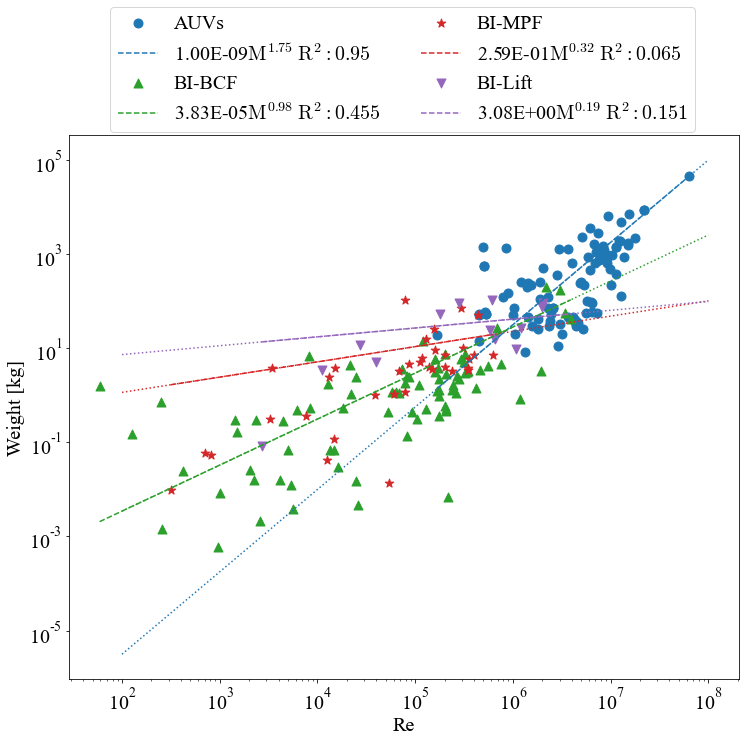

In [11]:
fig3, ax3 = plt.subplots(figsize=(12,10), facecolor='w')

markers = ['o', 'v', '*', '^', 'd']

dx = np.linspace(1e2, 1e8, 20)

model = PowerLawModel(prefix='p_')

#------------- conventional -----------------------------------
pars = model.guess(conv_mass['Weight [kg]'].values, x=conv_mass['Re'].values)
pars['p_amplitude'].set(value=6, min=1e-9, max=100.0)
pars['p_exponent'].set(value=0.5, min=.001, max=2.0)
fit = model.fit(conv_mass['Weight [kg]'].values, pars, x=conv_mass['Re'].values)
r_squared = calc_rsquared(conv_mass['Re'].values, conv_mass['Weight [kg]'].values, fit.params['p_amplitude'].value, fit.params['p_exponent'].value)

ax3.scatter(conv_mass['Re'].values, conv_mass['Weight [kg]'].values, marker='o', color='tab:blue', label='AUVs')
ax3.plot(conv_mass['Re'], fit.params['p_amplitude'].value*conv_mass['Re'].values**fit.params['p_exponent'].value, linestyle='--', color='tab:blue', 
        label='{:.2E}'.format(fit.params['p_amplitude'].value) + '$\mathrm{M^{' + str(np.round(fit.params['p_exponent'].value,2)) + '}\;R^2: ' 
        + str(np.round(r_squared, 3)) + '}$')
ax3.plot(dx, fit.params['p_amplitude'].value*dx**fit.params['p_exponent'].value, linestyle=':', color='tab:blue')    

#------------- BCF -----------------------------------
pars = model.guess(bcf_mass['Weight [kg]'].values, x=bcf_mass['Re'].values)
pars['p_amplitude'].set(value=6, min=1e-9, max=100.0)
pars['p_exponent'].set(value=0.5, min=.001, max=2.0)
fit = model.fit(bcf_mass['Weight [kg]'].values, pars, x=bcf_mass['Re'].values)
r_squared = calc_rsquared(bcf_mass['Re'].values, bcf_mass['Weight [kg]'].values, fit.params['p_amplitude'].value, fit.params['p_exponent'].value)

ax3.scatter(bcf_mass['Re'].values, bcf_mass['Weight [kg]'].values, marker='^', color='tab:green', label='BI-BCF')
ax3.plot(bcf_mass['Re'], fit.params['p_amplitude'].value*bcf_mass['Re'].values**fit.params['p_exponent'].value, linestyle='--', color='tab:green', 
        label='{:.2E}'.format(fit.params['p_amplitude'].value) + '$\mathrm{M^{' + str(np.round(fit.params['p_exponent'].value,2)) + '}\;R^2: ' 
        + str(np.round(r_squared, 3)) + '}$')
ax3.plot(dx, fit.params['p_amplitude'].value*dx**fit.params['p_exponent'].value, linestyle=':', color='tab:green')

#------------- MPF -----------------------------------
pars = model.guess(mpf_mass['Weight [kg]'].values, x=mpf_mass['Re'].values)
pars['p_amplitude'].set(value=6, min=1e-9, max=10)
pars['p_exponent'].set(value=0.5, min=0.1, max=2.0)
fit = model.fit(mpf_mass['Weight [kg]'].values, pars, x=mpf_mass['Re'].values)
r_squared = calc_rsquared(mpf_mass['Re'].values, mpf_mass['Weight [kg]'].values, fit.params['p_amplitude'].value, fit.params['p_exponent'].value)

ax3.scatter(mpf_mass['Re'].values, mpf_mass['Weight [kg]'].values, marker='*', color='tab:red', label='BI-MPF')
ax3.plot(mpf_mass['Re'], fit.params['p_amplitude'].value*mpf_mass['Re'].values**fit.params['p_exponent'].value, linestyle='--', color='tab:red', 
        label='{:.2E}'.format(fit.params['p_amplitude'].value) + '$\mathrm{M^{' + str(np.round(fit.params['p_exponent'].value,2)) + '}\;R^2: ' 
        + str(np.round(r_squared, 3)) + '}$')
ax3.plot(dx, fit.params['p_amplitude'].value*dx**fit.params['p_exponent'].value, linestyle=':', color='tab:red')

#------------- Lift -----------------------------------
pars = model.guess(lift_mass['Weight [kg]'].values, x=lift_mass['Re'].values)
pars['p_amplitude'].set(value=6, min=1e-9, max=10)
pars['p_exponent'].set(value=0.5, min=.001, max=2.0)
fit = model.fit(lift_mass['Weight [kg]'].values, pars, x=lift_mass['Re'].values)
r_squared = calc_rsquared(lift_mass['Re'].values, lift_mass['Weight [kg]'].values, fit.params['p_amplitude'].value, fit.params['p_exponent'].value)

ax3.scatter(lift_mass['Re'].values, lift_mass['Weight [kg]'].values, marker='v', color='tab:purple', label='BI-Lift')
ax3.plot(lift_mass['Re'], fit.params['p_amplitude'].value*lift_mass['Re'].values**fit.params['p_exponent'].value, linestyle='--', color='tab:purple', 
        label='{:.2E}'.format(fit.params['p_amplitude'].value) + '$\mathrm{M^{' + str(np.round(fit.params['p_exponent'].value,2)) + '}\;R^2: ' 
        + str(np.round(r_squared, 3)) + '}$')
ax3.plot(dx, fit.params['p_amplitude'].value*dx**fit.params['p_exponent'].value, linestyle=':', color='tab:purple')

ax3.set_xlabel('Re')
ax3.set_ylabel('Weight [kg]')
ax3.set_yscale('log')
ax3.set_xscale('log')
ax3.legend(ncol=2, loc=1, bbox_to_anchor=(0.95, 1.255))

fig3.savefig('Weight_Re.pdf', facecolor='w', dpi=300, bbox_inches='tight')

In [12]:
conv_mass = convDF[convDF['Weight [kg]'].notnull()]
bcf_mass = bcfDF[bcfDF['Weight [kg]'].notnull()]
mpf_mass = mpfDF[mpfDF['Weight [kg]'].notnull()]
lift_mass = liftDF[liftDF['Weight [kg]'].notnull()]

conv_mass = conv_mass[conv_mass['Length [m]'].notnull()]
bcf_mass = bcf_mass[bcf_mass['Length [m]'].notnull()]
mpf_mass = mpf_mass[mpf_mass['Length [m]'].notnull()]
lift_mass = lift_mass[lift_mass['Length [m]'].notnull()]

# sort the column values in ascending order
conv_mass = conv_mass.sort_values('Length [m]')
bcf_mass = bcf_mass.sort_values('Length [m]')
mpf_mass = mpf_mass.sort_values('Length [m]')
lift_mass = lift_mass.sort_values('Length [m]')

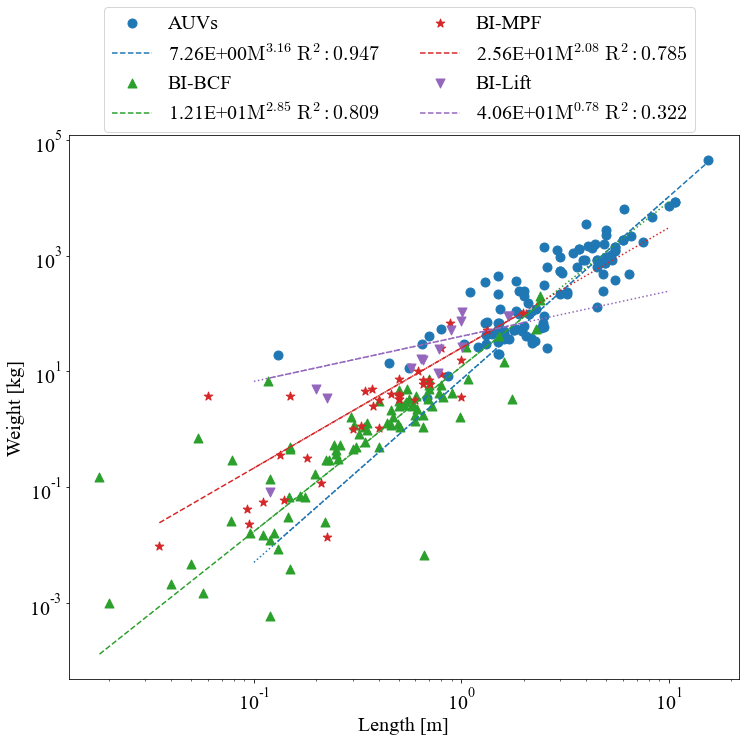

In [29]:
fig4, ax4 = plt.subplots(figsize=(12,10), facecolor='w')

markers = ['o', 'v', '*', '^', 'd']

dx = np.linspace(1e-1, 1e1, 20)

model = PowerLawModel(prefix='p_')

#------------- conventional -----------------------------------
pars = model.guess(conv_mass['Weight [kg]'].values, x=conv_mass['Length [m]'].values)
pars['p_amplitude'].set(value=40, min=7.26, max=100.0)
pars['p_exponent'].set(value=0.5, min=.001, max=5.0)
fit = model.fit(conv_mass['Weight [kg]'].values, pars, x=conv_mass['Length [m]'].values)
r_squared = calc_rsquared(conv_mass['Length [m]'].values, conv_mass['Weight [kg]'].values, fit.params['p_amplitude'].value, fit.params['p_exponent'].value)

ax4.scatter(conv_mass['Length [m]'].values, conv_mass['Weight [kg]'].values, marker='o', color='tab:blue', label='AUVs')
ax4.plot(conv_mass['Length [m]'], fit.params['p_amplitude'].value*conv_mass['Length [m]'].values**fit.params['p_exponent'].value, linestyle='--', color='tab:blue', 
        label='{:.2E}'.format(fit.params['p_amplitude'].value) + '$\mathrm{M^{' + str(np.round(fit.params['p_exponent'].value,2)) + '}\;R^2: ' 
        + str(np.round(r_squared, 3)) + '}$')
ax4.plot(dx, fit.params['p_amplitude'].value*dx**fit.params['p_exponent'].value, linestyle=':', color='tab:blue')    

#------------- BCF -----------------------------------
pars = model.guess(bcf_mass['Weight [kg]'].values, x=bcf_mass['Length [m]'].values)
pars['p_amplitude'].set(value=50, min=12.1, max=100.0)
pars['p_exponent'].set(value=0.5, min=.001, max=4.0)
fit = model.fit(bcf_mass['Weight [kg]'].values, pars, x=bcf_mass['Length [m]'].values)
r_squared = calc_rsquared(bcf_mass['Length [m]'].values, bcf_mass['Weight [kg]'].values, fit.params['p_amplitude'].value, fit.params['p_exponent'].value)

ax4.scatter(bcf_mass['Length [m]'].values, bcf_mass['Weight [kg]'].values, marker='^', color='tab:green', label='BI-BCF')
ax4.plot(bcf_mass['Length [m]'], fit.params['p_amplitude'].value*bcf_mass['Length [m]'].values**fit.params['p_exponent'].value, linestyle='--', color='tab:green', 
        label='{:.2E}'.format(fit.params['p_amplitude'].value) + '$\mathrm{M^{' + str(np.round(fit.params['p_exponent'].value,2)) + '}\;R^2: ' 
        + str(np.round(r_squared, 3)) + '}$')
ax4.plot(dx, fit.params['p_amplitude'].value*dx**fit.params['p_exponent'].value, linestyle=':', color='tab:green')

#------------- MPF -----------------------------------
pars = model.guess(mpf_mass['Weight [kg]'].values, x=mpf_mass['Length [m]'].values)
pars['p_amplitude'].set(value=6, min=0.0001, max=100)
pars['p_exponent'].set(value=0.5, min=0.1, max=5.0)
fit = model.fit(mpf_mass['Weight [kg]'].values, pars, x=mpf_mass['Length [m]'].values)
r_squared = calc_rsquared(mpf_mass['Length [m]'].values, mpf_mass['Weight [kg]'].values, fit.params['p_amplitude'].value, fit.params['p_exponent'].value)

ax4.scatter(mpf_mass['Length [m]'].values, mpf_mass['Weight [kg]'].values, marker='*', color='tab:red', label='BI-MPF')
ax4.plot(mpf_mass['Length [m]'], fit.params['p_amplitude'].value*mpf_mass['Length [m]'].values**fit.params['p_exponent'].value, linestyle='--', color='tab:red', 
        label='{:.2E}'.format(fit.params['p_amplitude'].value) + '$\mathrm{M^{' + str(np.round(fit.params['p_exponent'].value,2)) + '}\;R^2: ' 
        + str(np.round(r_squared, 3)) + '}$')
ax4.plot(dx, fit.params['p_amplitude'].value*dx**fit.params['p_exponent'].value, linestyle=':', color='tab:red')

#------------- Lift -----------------------------------
pars = model.guess(lift_mass['Weight [kg]'].values, x=lift_mass['Length [m]'].values)
pars['p_amplitude'].set(value=25, min=10, max=50)
pars['p_exponent'].set(value=0.5, min=.001, max=5.0)
fit = model.fit(lift_mass['Weight [kg]'].values, pars, x=lift_mass['Length [m]'].values)
r_squared = calc_rsquared(lift_mass['Length [m]'].values, lift_mass['Weight [kg]'].values, fit.params['p_amplitude'].value, fit.params['p_exponent'].value)

ax4.scatter(lift_mass['Length [m]'].values, lift_mass['Weight [kg]'].values, marker='v', color='tab:purple', label='BI-Lift')
ax4.plot(lift_mass['Length [m]'], fit.params['p_amplitude'].value*lift_mass['Length [m]'].values**fit.params['p_exponent'].value, linestyle='--', color='tab:purple', 
        label='{:.2E}'.format(fit.params['p_amplitude'].value) + '$\mathrm{M^{' + str(np.round(fit.params['p_exponent'].value,2)) + '}\;R^2: ' 
        + str(np.round(r_squared, 3)) + '}$')
ax4.plot(dx, fit.params['p_amplitude'].value*dx**fit.params['p_exponent'].value, linestyle=':', color='tab:purple')

ax4.set_xlabel('Length [m]')
ax4.set_ylabel('Weight [kg]')
ax4.set_yscale('log')
ax4.set_xscale('log')
ax4.legend(ncol=2, loc=1, bbox_to_anchor=(0.95, 1.255))

fig4.savefig('Weight_Length.pdf', facecolor='w', dpi=300, bbox_inches='tight')